In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML
from scipy.spatial import distance_matrix
from md import Atom, molecular_dynamics, optimize_geometry
from mdplot import plot_md_frame, animate_md_traj

np.random.seed(7)

# Homework Assignment:
---

Update the `f_coulomb` function in `md.py` to calculate atomic forces due to electrostatic interactions. With your updated force calculations, simulate a heterogeneous system with `Ar`, `Na`, and `Cl` atoms, and animate the trajectory. 

    (psssssttttt... updating the visualization functions in 
    `mdplot.py` so that atoms are colored by charge should 
    help you distinguish between different atom types)

In [2]:
# provide force field parameters for two atom types
the_force = {
    'Ar': {
        'mass': 39.95,  # amu
        'charge': 0.0,  # e
        'sigma': 3.4e-01,  # nm
        'epsilon': 9.94e-01,  # kJ/mol
    },
    'Na': {
        'mass': 22.99,
        'charge': 1.00,
        'sigma': 3.32840e-01,
        'epsilon': 1.15897e-02,
    },
    'Cl': {
        'mass': 35.45,  
        'charge': -1.00,  
        'sigma': 4.40104e-01,  
        'epsilon': 4.18400e-01,  
    },
}

# first larger system
n_ar_atoms = 10
n_na_atoms = 10
n_cl_atoms = 10

velocity_scalar = 0.3

# create box
box_len = 7.0  # nm

box = (
    [-box_len / 2, box_len / 2],  # x_min, x_max
    [-box_len / 2, box_len / 2],  # y_min, y_max
    [0, 0]  # operating on the x-y plane
)

# define function for adding atoms
def populate_box( start_spot, number_to_add, atom_id_to_add, atoms):
    for atom_id in range(start_spot, start_spot+number_to_add):
        pos = np.array([
            np.random.uniform(low=box[0][0], high=box[0][1]),
            np.random.uniform(low=box[1][0], high=box[1][1]),
            0
        ])
        vel = np.array([
            np.random.uniform(low=-1, high=1),
            np.random.uniform(low=-1, high=1),
            0
        ]) * velocity_scalar
        atoms.append(Atom(f'atom{atom_id}', atom_id_to_add, pos, vel, the_force))
    return atoms
        
# and then add atoms with random positions and velocities
atoms = populate_box(0, n_ar_atoms, 'Ar', [])
atoms = populate_box(10, n_na_atoms, 'Na', atoms)
atoms = populate_box(20, n_cl_atoms, 'Cl', atoms)

distance_cutoff = 0.4  # slightly larger than Argon sigma
# rearrange overlapping atoms
optimize_geometry(atoms, box, distance_cutoff)

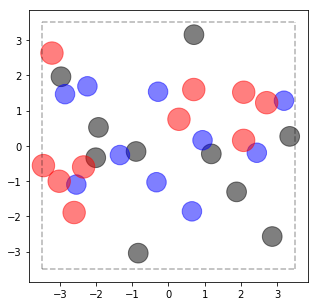

In [3]:
# run md
positions, velocities = molecular_dynamics(atoms, box, t_max=10.0)
# checkout initial position and make movie
movie = animate_md_traj(positions[::10, :, :], atoms, box, speed=5)

In [4]:
HTML(movie.to_html5_video())

### Challenges:
    1. Extend to 3 dimensions
    2. Implement periodic boundary conditions
    3. Create molecules by adding bonded forces